In [ ]:
import yfinance as yf
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
xrp_1d = yf.download(tickers='XRP-USD', start='2019-09-01', end = '2021-08-11', interval='1d')
xrp_1d.drop(columns = ['Open','High','Low','Adj Close','Volume'], inplace = True)
#xrp_1hr.reset_index(inplace=True)
#xrp_1hr.rename(columns = {'index':'Datetime'}, inplace = True)
#xrp_1hr.set_index(pd.to_datetime(xrp_1hr['Datetime'],infer_datetime_format=True),inplace=True)
xrp_1d.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2019-09-01,0.258054
2019-09-02,0.260820
2019-09-03,0.263139
2019-09-04,0.259905
2019-09-05,0.256346


In [ ]:
# Drop NAs and calculate daily percent return
xrp_1d['daily_return'] = xrp_1d['Close'].dropna().pct_change()
xrp_1d

,Close,daily_return
Date,,
2019-09-01,0.258054,NaN
2019-09-02,0.260820,0.010719
2019-09-03,0.263139,0.008891
2019-09-04,0.259905,-0.012290
2019-09-05,0.256346,-0.013694
...,...,...
2021-08-07,0.816281,0.093459
2021-08-08,0.778739,-0.045992
2021-08-09,0.818553,0.051126


In [ ]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
xrp_1d['fast_close'] = xrp_1d['Close'].ewm(halflife=short_window).mean()
xrp_1d['slow_close'] = xrp_1d['Close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
xrp_1d['crossover_long'] = np.where(xrp_1d['fast_close'] > xrp_1d['slow_close'], 1.0, 0.0)
xrp_1d['crossover_short'] = np.where(xrp_1d['fast_close'] < xrp_1d['slow_close'], -1.0, 0.0)
xrp_1d['crossover_signal'] = xrp_1d['crossover_long'] + xrp_1d['crossover_short']

xrp_1d.head()

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
Date,,,,,,,
2019-09-01,0.258054,NaN,0.258054,0.258054,0.0,0.0,0.0
2019-09-02,0.260820,0.010719,0.259898,0.259485,1.0,0.0,1.0
2019-09-03,0.263139,0.008891,0.261750,0.260788,1.0,0.0,1.0
2019-09-04,0.259905,-0.012290,0.260766,0.260544,1.0,0.0,1.0
2019-09-05,0.256346,-0.013694,0.258485,0.259584,0.0,-1.0,-1.0


<AxesSubplot:xlabel='Date'>

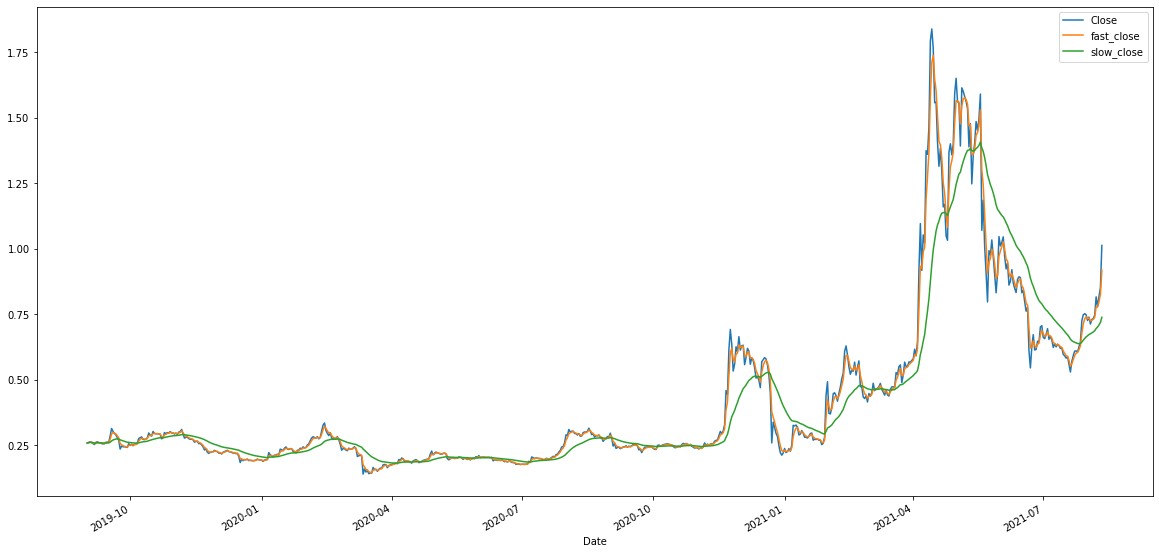

In [ ]:
# Plot the EMA of XRP/USD closing prices
xrp_1d[['Close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

In [ ]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
xrp_1d['fast_vol'] = xrp_1d['daily_return'].ewm(halflife=short_vol_window).std()
xrp_1d['slow_vol'] = xrp_1d['daily_return'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
xrp_1d['vol_trend_long'] = np.where(xrp_1d['fast_vol'] < xrp_1d['slow_vol'], 1.0, 0.0)
xrp_1d['vol_trend_short'] = np.where(xrp_1d['fast_vol'] > xrp_1d['slow_vol'], -1.0, 0.0) 
xrp_1d['vol_trend_signal'] = xrp_1d['vol_trend_long'] + xrp_1d['vol_trend_short']

xrp_1d

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal
Date,,,,,,,,,,,,
2019-09-01,0.258054,NaN,0.258054,0.258054,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2019-09-02,0.260820,0.010719,0.259898,0.259485,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0
2019-09-03,0.263139,0.008891,0.261750,0.260788,1.0,0.0,1.0,0.001292,0.001292,0.0,0.0,0.0
2019-09-04,0.259905,-0.012290,0.260766,0.260544,1.0,0.0,1.0,0.014285,0.012986,0.0,-1.0,-1.0
2019-09-05,0.256346,-0.013694,0.258485,0.259584,0.0,-1.0,-1.0,0.011559,0.013172,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-07,0.816281,0.093459,0.777345,0.695521,1.0,0.0,1.0,0.052160,0.046380,0.0,-1.0,-1.0
2021-08-08,0.778739,-0.045992,0.778042,0.701093,1.0,0.0,1.0,0.070607,0.047261,0.0,-1.0,-1.0
2021-08-09,0.818553,0.051126,0.798297,0.708959,1.0,0.0,1.0,0.057924,0.046880,0.0,-1.0,-1.0


<AxesSubplot:xlabel='Date'>

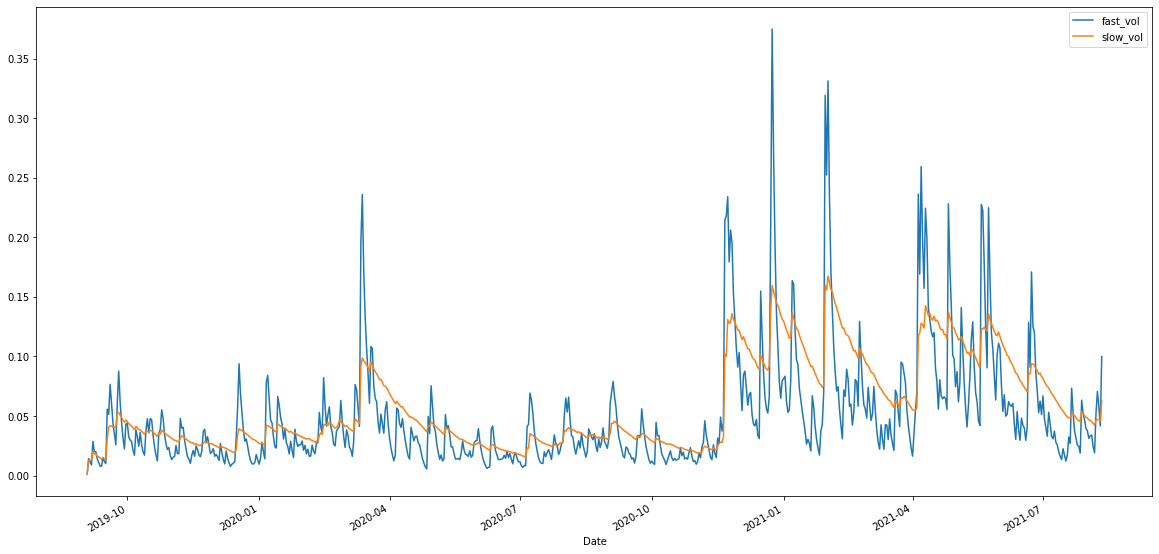

In [ ]:
# Plot the EMA of BTC/USD daily return volatility
xrp_1d[['fast_vol', 'slow_vol']].plot(figsize=(20,10))

In [ ]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
xrp_1d['bollinger_mid_band'] = xrp_1d['Close'].rolling(window=bollinger_window).mean()
xrp_1d['bollinger_std'] = xrp_1d['Close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
xrp_1d['bollinger_upper_band']  = xrp_1d['bollinger_mid_band'] + (xrp_1d['bollinger_std'] * 1)
xrp_1d['bollinger_lower_band']  = xrp_1d['bollinger_mid_band'] - (xrp_1d['bollinger_std'] * 1)

# Calculate bollinger band trading signal
xrp_1d['bollinger_long'] = np.where(xrp_1d['Close'] < xrp_1d['bollinger_lower_band'], 1.0, 0.0)
xrp_1d['bollinger_short'] = np.where(xrp_1d['Close'] > xrp_1d['bollinger_upper_band'], -1.0, 0.0)
xrp_1d['bollinger_signal'] = xrp_1d['bollinger_long'] + xrp_1d['bollinger_short']

xrp_1d

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Date,,,,,,,,,,,,,,,,,,,
2019-09-01,0.258054,NaN,0.258054,0.258054,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-09-02,0.260820,0.010719,0.259898,0.259485,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-09-03,0.263139,0.008891,0.261750,0.260788,1.0,0.0,1.0,0.001292,0.001292,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-09-04,0.259905,-0.012290,0.260766,0.260544,1.0,0.0,1.0,0.014285,0.012986,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-09-05,0.256346,-0.013694,0.258485,0.259584,0.0,-1.0,-1.0,0.011559,0.013172,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-07,0.816281,0.093459,0.777345,0.695521,1.0,0.0,1.0,0.052160,0.046380,0.0,-1.0,-1.0,0.676120,0.082178,0.758298,0.593942,0.0,-1.0,-1.0
2021-08-08,0.778739,-0.045992,0.778042,0.701093,1.0,0.0,1.0,0.070607,0.047261,0.0,-1.0,-1.0,0.687179,0.080243,0.767422,0.606936,0.0,-1.0,-1.0
2021-08-09,0.818553,0.051126,0.798297,0.708959,1.0,0.0,1.0,0.057924,0.046880,0.0,-1.0,-1.0,0.701640,0.076262,0.777902,0.625378,0.0,-1.0,-1.0


<AxesSubplot:xlabel='Date'>

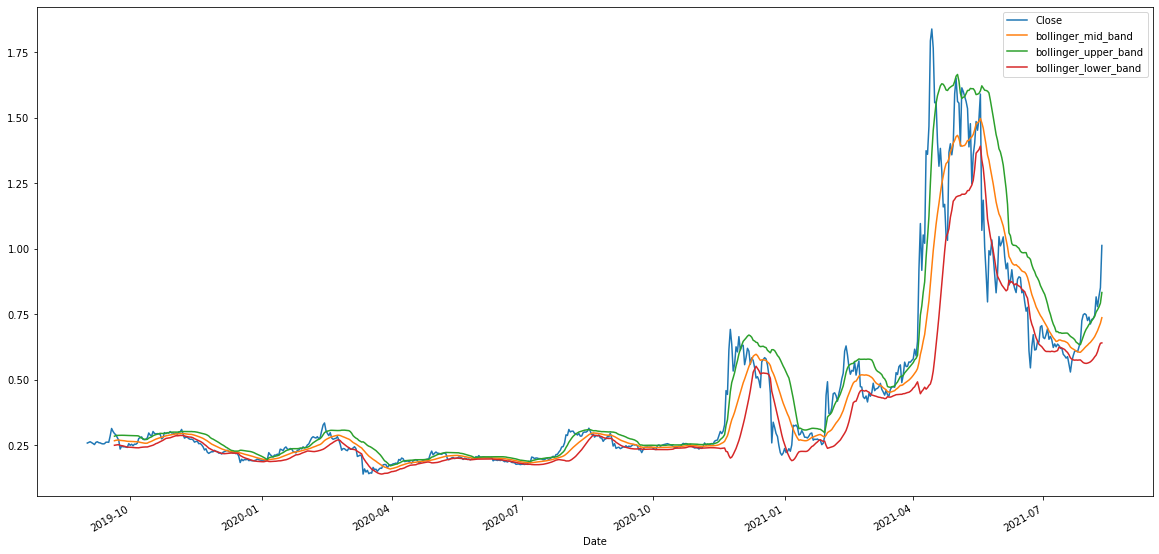

In [ ]:
# Plot the Bollinger Bands for BTC/USD closing prices
xrp_1d[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

In [ ]:
# MACD 
!pip install pandas_ta
import pandas_ta as ta

     |████████████████████████████████| 115 kB 27.6 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=353afdaa29c53f6a2d7a2a9eb214f9478e918d1dfa86f9f9666efee5ea68ca86
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Calculate MACD values using the pandas_ta library
xrp_1d.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
xrp_1d

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,...,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-01,0.258054,NaN,0.258054,0.258054,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2019-09-02,0.260820,0.010719,0.259898,0.259485,1.0,0.0,1.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2019-09-03,0.263139,0.008891,0.261750,0.260788,1.0,0.0,1.0,0.001292,0.001292,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2019-09-04,0.259905,-0.012290,0.260766,0.260544,1.0,0.0,1.0,0.014285,0.012986,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2019-09-05,0.256346,-0.013694,0.258485,0.259584,0.0,-1.0,-1.0,0.011559,0.013172,1.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-07,0.816281,0.093459,0.777345,0.695521,1.0,0.0,1.0,0.052160,0.046380,0.0,...,0.676120,0.082178,0.758298,0.593942,0.0,-1.0,-1.0,0.031352,0.014137,0.017215
2021-08-08,0.778739,-0.045992,0.778042,0.701093,1.0,0.0,1.0,0.070607,0.047261,0.0,...,0.687179,0.080243,0.767422,0.606936,0.0,-1.0,-1.0,0.033097,0.012706,0.020392
2021-08-09,0.818553,0.051126,0.798297,0.708959,1.0,0.0,1.0,0.057924,0.046880,0.0,...,0.701640,0.076262,0.777902,0.625378,0.0,-1.0,-1.0,0.037264,0.013498,0.023766


In [ ]:
#!pip install termcolor
import numpy as np
from math import floor
from termcolor import colored as cl
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [ ]:
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

xrp_macd = get_macd(xrp_1d['Close'], 26, 12, 9)
xrp_macd.tail()

,macd,signal,hist
Date,,,
2021-08-07,0.031352,0.017215,0.014137
2021-08-08,0.033097,0.020392,0.012706
2021-08-09,0.037264,0.023766,0.013498
2021-08-10,0.042711,0.027555,0.015156
2021-08-11,0.059358,0.033916,0.025442


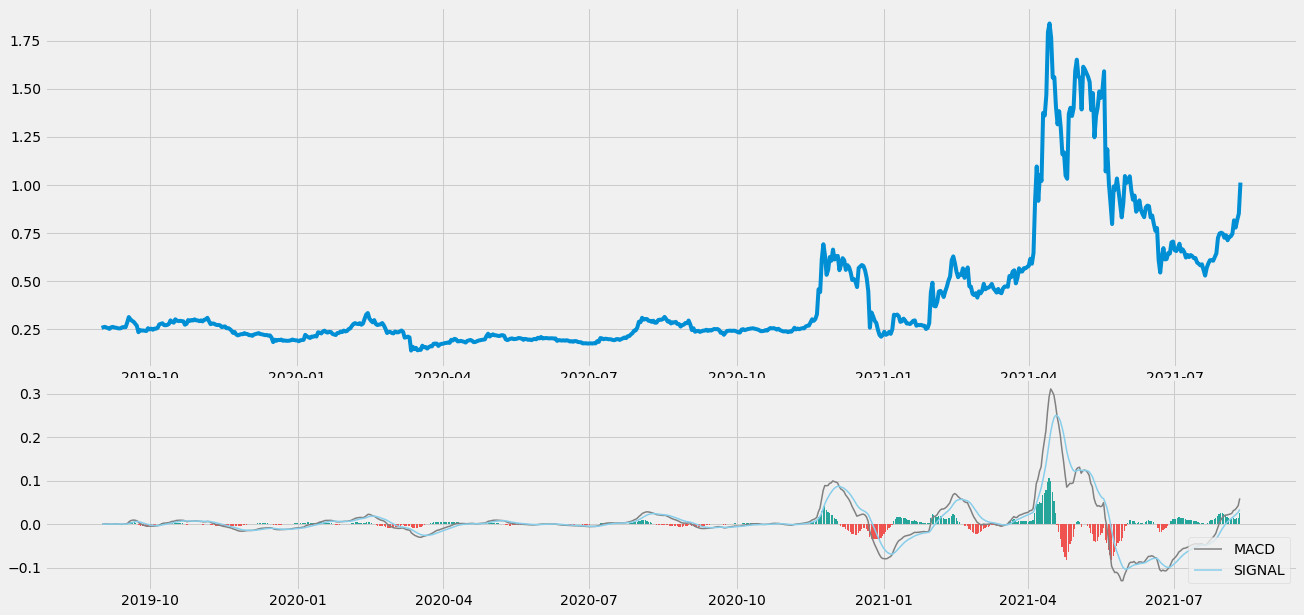

In [ ]:
def plot_macd(prices, macd, signal, hist):
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

plot_macd(xrp_1d['Close'], xrp_macd['macd'], xrp_macd['signal'], xrp_macd['hist'])

In [ ]:
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal
            
buy_price, sell_price, macd_signal = implement_macd_strategy(xrp_1d['Close'], xrp_macd)

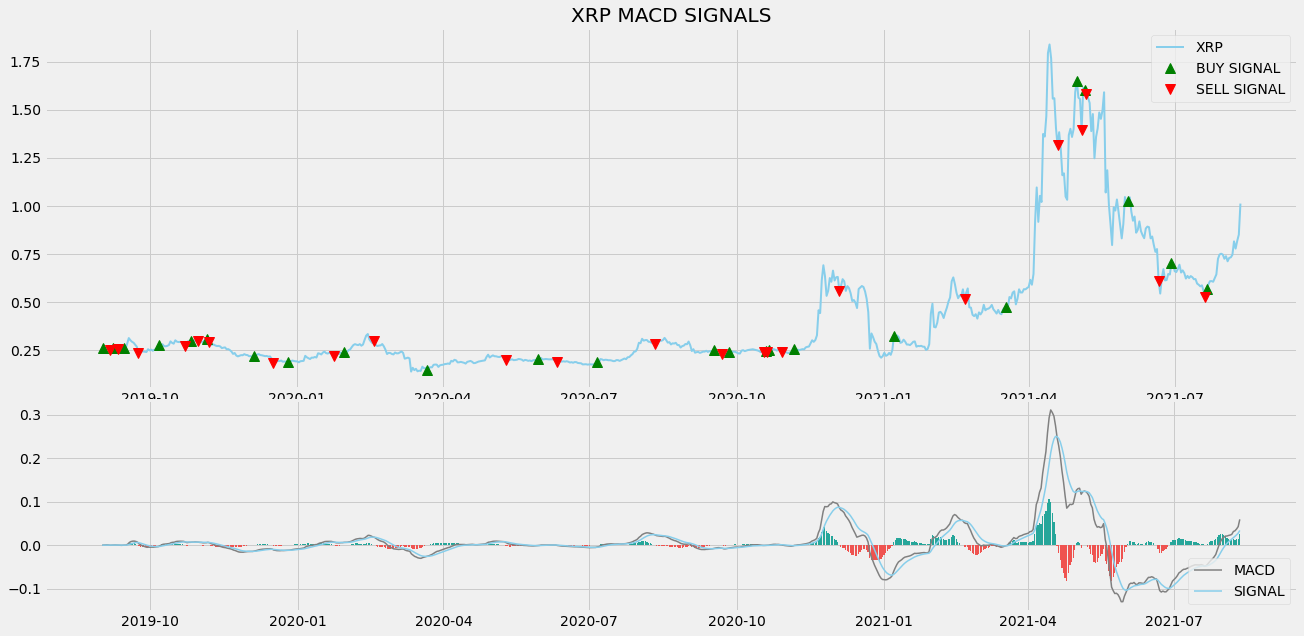

In [ ]:
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

ax1.plot(xrp_1d['Close'], color = 'skyblue', linewidth = 2, label = 'XRP')
ax1.plot(xrp_1d.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(xrp_1d.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend()
ax1.set_title('XRP MACD SIGNALS')
ax2.plot(xrp_macd['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
ax2.plot(xrp_macd['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

for i in range(len(xrp_macd)):
    if str(xrp_macd['hist'][i])[0] == '-':
        ax2.bar(xrp_macd.index[i], xrp_macd['hist'][i], color = '#ef5350')
    else:
        ax2.bar(xrp_macd.index[i], xrp_macd['hist'][i], color = '#26a69a')
        
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
position = []
for i in range(len(macd_signal)):
    if macd_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(xrp_1d['Close'])):
    if macd_signal[i] == 1:
        position[i] = 1
    elif macd_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
macd = xrp_macd['macd']
signal = xrp_macd['signal']
close_price = xrp_1d['Close']
macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'}).set_index(xrp_1d.index)
position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(xrp_1d.index)

frames = [close_price, macd, signal, macd_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,Close,macd,signal,macd_signal,macd_position
Date,,,,,
2019-09-01,0.258054,0.000000,0.000000,0,1
2019-09-02,0.260820,0.000221,0.000044,1,1
2019-09-03,0.263139,0.000576,0.000151,0,1
2019-09-04,0.259905,0.000590,0.000238,0,1
2019-09-05,0.256346,0.000310,0.000253,0,1
...,...,...,...,...,...
2021-08-07,0.816281,0.031352,0.017215,0,1
2021-08-08,0.778739,0.033097,0.020392,0,1
2021-08-09,0.818553,0.037264,0.023766,0,1


In [ ]:
strategy.to_csv('XRP_DAILY_MACD_TRADE_STRATEGY.CSV')

In [ ]:
xrp_ret = pd.DataFrame(np.diff(xrp_1d['Close'])).rename(columns = {0:'returns'})
macd_strategy_ret = []

for i in range(len(xrp_ret)):
    try:
        returns = xrp_ret['returns'][i]*strategy['macd_position'][i]
        macd_strategy_ret.append(returns)
    except:
        pass
    
macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {0:'macd_returns'})

investment_value = 100000
number_of_stocks = floor(investment_value/xrp_1d['Close'][-1])
macd_investment_ret = []

for i in range(len(macd_strategy_ret_df['macd_returns'])):
    returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
    macd_investment_ret.append(returns)

macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the MACD strategy by investing $100k in XRP : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the MACD strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the MACD strategy by investing $100k in XRP : 98346.21
Profit percentage of the MACD strategy : 98%


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d12c285c-6789-4c45-9ad7-1be9b4d60622' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>